In [62]:
library(cbioportalR)
library(g3viz)
library(AnVIL)
library(rapiclient)
library(maftools)
library(survival)
library(survminer)
library(xfun)

In [63]:
#### Example 1
# ============================================
# Read in MAF file
#   In addition to read data in, g3viz::readMAF function does
#     1. parse "Mutation_Class" information from the "Variant_Classification"
#        column (also named "Mutation_Type" in some files)
#     2. parse "AA_position" (amino-acid position) from the "HGVSp_Short" column 
#        (also named "amino_acid_change" in some files) (e.g., p.Q136P)
# ============================================
maf.file <- system.file("extdata", "TCGA.BRCA.varscan.somatic.maf.gz", package = "g3viz")

In [64]:
mutation.dat <- readMAF(maf.file)


In [65]:
chart.options <- g3Lollipop.theme(theme.name = "default",
                                  title.text = "PIK3CA gene (default theme)")

In [67]:
### Example 2
# load data
mutation.csv <- system.file("extdata", "ccle.csv", package = "g3viz")

In [68]:
# ============================================
# read in data
#   "gene.symbol.col"    : column of gene symbol
#   "variant.class.col"  : column of variant class
#   "protein.change.col" : colum of protein change column
# ============================================
mutation.dat <- readMAF(mutation.csv,
                        gene.symbol.col = "Hugo_Symbol",
                        variant.class.col = "Variant_Classification",
                        protein.change.col = "amino_acid_change",
                        sep = ",")  # column-separator of csv file


In [69]:
# set up chart options
plot.options <- g3Lollipop.options(
  # Chart settings
  chart.width = 600,
  chart.type = "pie",
  chart.margin = list(left = 30, right = 20, top = 20, bottom = 30),
  chart.background = "#d3d3d3",
  transition.time = 300,
  # Lollipop track settings
  lollipop.track.height = 200,
  lollipop.track.background = "#d3d3d3",
  lollipop.pop.min.size = 1,
  lollipop.pop.max.size = 8,
  lollipop.pop.info.limit = 5.5,
  lollipop.pop.info.dy = "0.24em",
  lollipop.pop.info.color = "white",
  lollipop.line.color = "#a9A9A9",
  lollipop.line.width = 3,
  lollipop.circle.color = "#ffdead",
  lollipop.circle.width = 0.4,
  lollipop.label.ratio = 2,
  lollipop.label.min.font.size = 12,
  lollipop.color.scheme = "dark2",
  highlight.text.angle = 60,
  # Domain annotation track settings
  anno.height = 16,
  anno.margin = list(top = 0, bottom = 0),
  anno.background = "#d3d3d3",
  anno.bar.fill = "#a9a9a9",
  anno.bar.margin = list(top = 4, bottom = 4),
  domain.color.scheme = "pie5",
  domain.margin = list(top = 2, bottom = 2),
  domain.text.color = "white",
  domain.text.font = "italic 8px Serif",
  # Y-axis label
  y.axis.label = "# of TP53 gene mutations",
  axis.label.color = "#303030",
  axis.label.alignment = "end",
  axis.label.font = "italic 12px Serif",
  axis.label.dy = "-1.5em",
  y.axis.line.color = "#303030",
  y.axis.line.width = 0.5,
  y.axis.line.style = "line",
  y.max.range.ratio = 1.1,
  # Chart title settings
  title.color = "#303030",
  title.text = "TP53 gene (customized chart options)",
  title.font = "bold 12px monospace",
  title.alignment = "start",
  # Chart legend settings
  legend = TRUE,
  legend.margin = list(left=20, right = 0, top = 10, bottom = 5),
  legend.interactive = TRUE,
  legend.title = "Variant classification",
  # Brush selection tool
  brush = TRUE,
  brush.selection.background = "#F8F8FF",
  brush.selection.opacity = 0.3,
  brush.border.color = "#a9a9a9",
  brush.border.width = 1,
  brush.handler.color = "#303030",
  # tooltip and zoom
  tooltip = TRUE,
  zoom = TRUE
)

In [72]:
# "cbioportal" chart theme
plot.options <- g3Lollipop.theme(theme.name = "cbioportal",
                                 title.text = "TP53 gene (cbioportal theme)",
                                 y.axis.label = "# of TP53 Mutations")


In [74]:
library(cBioPortalData)

In [75]:
cbio <- cBioPortal()
studies <- getStudies(cbio, buildReport = TRUE)
head(studies)

name,description,publicStudy,groups,status,importDate,allSampleCount,readPermission,studyId,cancerTypeId,referenceGenome,pmid,citation,api_build,pack_build
<chr>,<chr>,<lgl>,<chr>,<int>,<chr>,<int>,<lgl>,<chr>,<chr>,<chr>,<chr>,<chr>,<lgl>,<lgl>
"Adrenocortical Carcinoma (TCGA, Firehose Legacy)","TCGA Adrenocortical Carcinoma. Source data from <A HREF=""http://gdac.broadinstitute.org/runs/stddata__2016_01_28/data/ACC/20160128/"">GDAC Firehose</A>. Previously known as TCGA Provisional.",TRUE,PUBLIC,0,2022-10-26 14:56:04,92,TRUE,acc_tcga,acc,hg19,NA,NA,TRUE,TRUE
"Acute Lymphoblastic Leukemia (St Jude, Nat Genet 2015)",Comprehensive profiling of infant MLL-rearranged acute lymphoblastic leukemia (MLL-R ALL),TRUE,PUBLIC,0,2022-10-26 14:56:22,93,TRUE,all_stjude_2015,bll,hg19,25730765,Andersson et al. Nat Genet 2015,TRUE,TRUE
"Hypodiploid Acute Lymphoid Leukemia (St Jude, Nat Genet 2013)","Whole genome or exome sequencing of 44 (20 whole genome, 20 exome) ALL tumor/normal pairs.",TRUE,,0,2022-10-26 14:56:24,44,TRUE,all_stjude_2013,myeloid,hg19,23334668,Holmfeldt et al. Nat Genet 2013,TRUE,TRUE
"Adenoid Cystic Carcinoma of the Breast (MSK, J Pathol. 2015)",Whole exome sequencing of 12 breast AdCCs.,TRUE,ACYC;PUBLIC,0,2022-10-26 14:56:25,12,TRUE,acbc_mskcc_2015,acbc,hg19,26095796,Martelotto et al. J Pathol 2015,TRUE,TRUE
"Adenoid Cystic Carcinoma (FMI, Am J Surg Pathl. 2014)",Targeted Sequencing of 28 metastatic Adenoid Cystic Carcinoma samples.,TRUE,ACYC;PUBLIC,0,2022-10-26 14:56:30,28,TRUE,acyc_fmi_2014,acyc,hg19,24418857,Ross et al. Am J Surg Pathl 2014,TRUE,FALSE
"Adenoid Cystic Carcinoma (JHU, Cancer Prev Res 2016)",Whole-genome or whole-exome sequencing of 25 adenoid cystic carcinoma tumor/normal pairs.,TRUE,ACYC;PUBLIC,0,2022-10-26 14:56:31,25,TRUE,acyc_jhu_2016,acyc,hg19,26862087,"Rettig et al, Cancer Prev Res 2016",TRUE,TRUE


In [76]:
gbm <- cBioPortalData(api = cbio, by = "hugoGeneSymbol", studyId = "gbm_tcga",
                      genePanelId = "IMPACT341",
                      molecularProfileIds = c("gbm_tcga_rppa", "gbm_tcga_linear_CNA")
                      )
gbm

harmonizing input:
  removing 16 colData rownames not in sampleMap 'primary'



A MultiAssayExperiment object of 2 listed
 experiments with user-defined names and respective classes.
 Containing an ExperimentList class object of length 2:
 [1] gbm_tcga_rppa: SummarizedExperiment with 67 rows and 244 columns
 [2] gbm_tcga_linear_CNA: SummarizedExperiment with 339 rows and 577 columns
Functionality:
 experiments() - obtain the ExperimentList instance
 colData() - the primary/phenotype DataFrame
 sampleMap() - the sample coordination DataFrame
 `$`, `[`, `[[` - extract colData columns, subset, or experiment
 *Format() - convert into a long or wide DataFrame
 assays() - convert ExperimentList to a SimpleList of matrices
 exportClass() - save data to flat files

In [77]:
table(colData(gbm)$OS_STATUS)
class(colData(gbm)$OS_MONTHS)


  0:LIVING 1:DECEASED 
       101        484 

[1] "character"

In [78]:
colgbm <- colData(gbm)
#colgbm[colgbm$OS_MONTHS == "[Not Available]", "OS_MONTHS"] <- NA
colgbm$OS_MONTHS <- as.numeric(colgbm$OS_MONTHS)
colData(gbm) <- colgbm

In [79]:
fit <- survfit(
  Surv(OS_MONTHS, as.numeric(substr(OS_STATUS, 1, 1))) ~ SEX,
  data = colData(gbm)
)

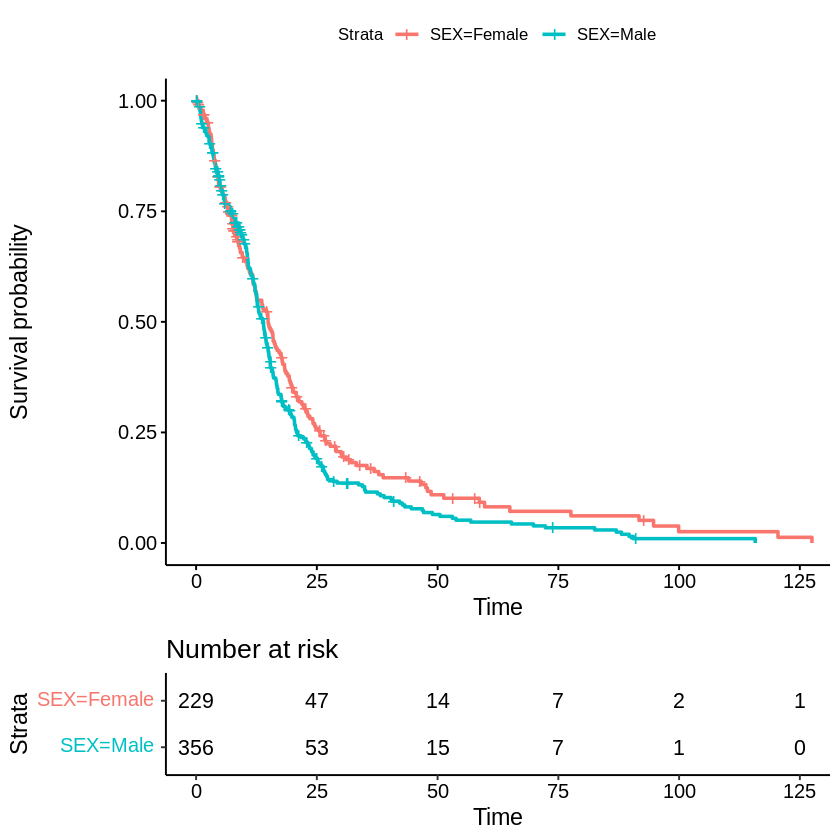

In [80]:
# simple survival model using SEX as a covariate and we draw the K-M plot
ggsurvplot(fit, data = colData(gbm), risk.table = TRUE)

In [81]:
acc <- cBioPortalData(api = cbio, by = "hugoGeneSymbol", studyId = "acc_tcga",
    genePanelId = "IMPACT341",
    molecularProfileIds = c("acc_tcga_rppa", "acc_tcga_linear_CNA")
)
acc

harmonizing input:
  removing 1 colData rownames not in sampleMap 'primary'



A MultiAssayExperiment object of 2 listed
 experiments with user-defined names and respective classes.
 Containing an ExperimentList class object of length 2:
 [1] acc_tcga_rppa: SummarizedExperiment with 57 rows and 46 columns
 [2] acc_tcga_linear_CNA: SummarizedExperiment with 339 rows and 90 columns
Functionality:
 experiments() - obtain the ExperimentList instance
 colData() - the primary/phenotype DataFrame
 sampleMap() - the sample coordination DataFrame
 `$`, `[`, `[[` - extract colData columns, subset, or experiment
 *Format() - convert into a long or wide DataFrame
 assays() - convert ExperimentList to a SimpleList of matrices
 exportClass() - save data to flat files

In [82]:
table(colData(acc)$OS_STATUS)
class(colData(acc)$OS_STATUS)


  0:LIVING 1:DECEASED 
        58         33 

[1] "character"

In [83]:
colacc <- colData(acc)
#colgbm[colgbm$OS_MONTHS == "[Not Available]", "OS_MONTHS"] <- NA
colacc$OS_MONTHS <- as.numeric(colacc$OS_MONTHS)
colData(acc) <- colacc

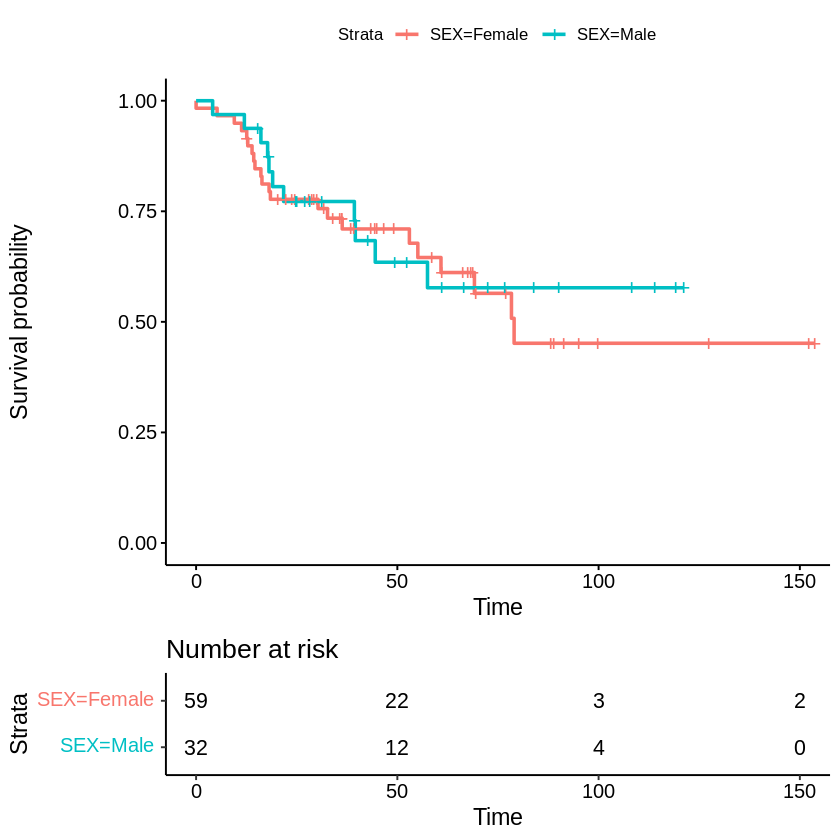

In [84]:
fit <- survfit(
    Surv(OS_MONTHS, as.numeric(substr(OS_STATUS, 1, 1))) ~ SEX,
    data = colData(acc)
)
ggsurvplot(fit, data = colData(acc), risk.table = TRUE)

In [85]:
# Clear cBioPortal cache
unlink("~/.cache/cBioPortalData/")